In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
import numpy as np
from scipy import stats
from difflib import SequenceMatcher

In [3]:
# load xlsx data
data = pd.read_excel('./mpg.data.xlsx')

In [4]:
# used to select correct columns
data = data[['mpg', 'cylinders', 'displayments', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']]

In [5]:
# used to extract car brands from car name
def getBrand(x):
    brand = x.lower().split()[0]
    return brand
data['brand'] = data['car name'].map(getBrand)

In [6]:
# used to create bag of words from car brands in order to find typos
bagOfWords = {}
for name in data['brand']:
    words = name.lower().replace('(', '').replace(')', '').split()
    for word in words:
        if word not in bagOfWords:
            bagOfWords[word] = 0
        bagOfWords[word] += 1

In [7]:
# used to find typos
matchStrictness = 0.7
foundWords = []
for word in bagOfWords:
    for altWord in bagOfWords:
        if word in foundWords or altWord in foundWords:
            continue
        if word.isdigit() or altWord.isdigit():
            continue
        if word == altWord:
            continue
        similarity = SequenceMatcher(None, word, altWord)
        if similarity.ratio() > matchStrictness:
            foundWords.append(word)
            foundWords.append(altWord)
            print(f'{word} - {altWord}')

chevrolet - chevroelt
toyota - toyouta
volkswagen - vokswagen
mazda - maxda
mercedes-benz - mercedes


In [8]:
# used to fix typos in brand name column
def getBrand(x):
    brand = x.lower().split()[0]
    if (brand == 'vw' or brand == 'vokswagen'):
        return 'volkswagen'
    if (brand == 'toyouta'):
        return 'toyota'
    if (brand == 'maxda'):
        return 'mazda'
    if (brand == 'chevroelt'):
        return 'chevrolet'
    if (brand == 'mercedes-benz'):
        return 'mercedes'
    return brand
data['brand'] = data['car name'].map(getBrand)

In [9]:
# used to create new columns based on the existance of the following tokens in the 'car name'
carTokens = ['sw', 'custom', 'brougham', 'diesel', 'turbo', 'classic', 'dl', 'coupe', 'deluxe', 'sport', 'pickup', 'auto', 'man', '2+2']

for token in carTokens:
    def tokenExistsInName(x):
        name = x.lower()
        return token in name
    data[token] = data['car name'].map(tokenExistsInName)

In [10]:
data

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name,brand,...,turbo,classic,dl,coupe,deluxe,sport,pickup,auto,man,2+2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,...,False,False,False,False,False,False,False,False,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,buick,...,False,False,False,False,False,False,False,False,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,plymouth,...,False,False,False,False,False,False,False,False,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,amc,...,False,False,False,False,False,False,False,False,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,ford,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,ford,...,False,False,False,False,False,False,False,False,False,False
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,volkswagen,...,False,False,False,False,False,False,True,False,False,False
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,dodge,...,False,False,False,False,False,False,False,False,False,False
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,ford,...,False,False,False,False,False,False,False,False,False,False


In [11]:
data.to_csv("extracted.data.csv")

## Exploration (Nikos)

In [26]:
import seaborn as sns

In [14]:
df = data

In [15]:
df.columns

Index(['mpg', 'cylinders', 'displayments', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name', 'brand', 'sw',
       'custom', 'brougham', 'diesel', 'turbo', 'classic', 'dl', 'coupe',
       'deluxe', 'sport', 'pickup', 'auto', 'man', '2+2'],
      dtype='object')

In [16]:
df.describe(include='bool')
#βλέπω 48 τιμές για το sw και 18 για το custom. Τα υπόπλοιπα μοιάζουν πολύ λίγα

,sw,custom,brougham,diesel,turbo,classic,dl,coupe,deluxe,sport,pickup,auto,man,2+2
count,406,406,406,406,406,406,406,406,406,406,406,406,406,406
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,358,388,396,399,404,400,400,401,401,403,405,404,402,404


In [17]:
pd.pivot_table(df, index='sw', columns='cylinders', values='mpg')

cylinders,3,4,5,6,8
sw,,,,,
False,20.55,29.591573,27.366667,20.009639,15.047126
True,NaN,27.200000,NaN,18.000000,14.506250


In [21]:
display(df.sw.mean())

0.11822660098522167

In [23]:
display(df.custom.mean())

0.04433497536945813

In [24]:
#dfC = df[['mpg','cylinders','displayments','horsepower','weight','acceleration','model year','origin','sw','custom']]

<AxesSubplot:xlabel='sw', ylabel='mpg'>

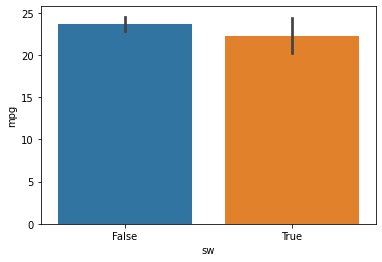

In [27]:
sns.barplot(y='mpg', x='sw', data=df)

<AxesSubplot:xlabel='custom', ylabel='mpg'>

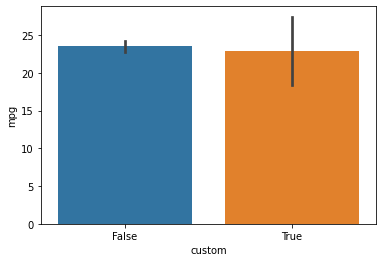

In [28]:
sns.barplot(y='mpg', x='custom', data=df)